### Can you come up out 3 sceneraies which use AI methods

Ans:垃圾邮件分类，自动驾驶，语音识别

### How do we use Github;Why do we use Jupyter and Pycharm

Ans:

In [1]:
adj_grammar="""
Adj* => null| Adj Adj*
Adj => 蓝色的 | 好看的 |小小的
"""

In [2]:
grammar={}
for line in adj_grammar.split('\n'):
    if not line.strip():continue #如果内容为空则不执行之后的内容
    exp,stmt = line.split("=>")
    grammar[exp.strip()]=[s.split() for s in stmt.split("|")]#注意是s.split
print(grammar['Adj*'])
print(grammar)

[['null'], ['Adj', 'Adj*']]
{'Adj*': [['null'], ['Adj', 'Adj*']], 'Adj': [['蓝色的'], ['好看的'], ['小小的']]}


In [3]:
import random
def generate(gram,target):
    if target not in gram: return target#target 可以被扩展
    expanded = [generate(gram,t) for t in random.choice(gram[target])]
    return ' '.join([e for e in expanded if e!= 'null'])

In [4]:
generate(gram=grammar,target='Adj*')

'小小的 '

In [5]:
#将之前的产生语法的代码抽象成一个函数
def create_grammar(grammar_str):
    grammar={}
    for line in grammar_str.split('\n'):
        if not line.strip(): continue
        exp,stmt = line.split('=>')
        grammar[exp.strip()]=[s.split() for s in stmt.split('|')]
    return(grammar)
create_grammar(adj_grammar)
    

{'Adj*': [['null'], ['Adj', 'Adj*']], 'Adj': [['蓝色的'], ['好看的'], ['小小的']]}

In [6]:
generate(gram=grammar,target='Adj*')

''

In [7]:
simple_grammar="""
sentence => noun_phrase verb_phrase
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article => 一个 | 这个 
noun => 女人 | 篮球 | 桌子 | 小猫
verb => 看着 | 坐在 | 听着 | 看见
Adj => 蓝色的 | 好看的 | 小小的
"""
grammar=create_grammar(simple_grammar)

In [8]:
generate(gram=grammar,target='sentence')

'一个 好看的 好看的 好看的 好看的  小猫 看见 一个  小猫'

### 编程实践部分

#### 1.设计你自己的句子生成器

请定义你自己的语法

第一个语法

In [9]:
human="""
human => 自己  寻找  活动
自己 => 我 | 俺 | 我们
寻找 => 看着 | 找找 | 想找点
活动 => 乐子 | 玩的
"""

第二个语法

In [10]:
host="""
host => 寒暄  报数  询问  业务相关 结尾
报数 => 我是 数字 号 ，
数字 => 单个数字 | 数字 单个数字
单个数字 => 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 0
寒暄 => 称谓  打招呼 | 打招呼
称谓 => 人称
人称 => 先生 | 女士 | 小朋友
打招呼 => 你好 | 您好
询问 => 请问你要 | 您需要
业务相关 => 玩玩 具体业务
玩玩 => 刷一刷 | 玩一玩
具体业务 => 喝酒 | 打牌 | 打猎 |赌博
结尾 => 吗？ 

"""

TO DO: 然后，使用自己之前定义的generate函数，使用此函数生成句子

In [11]:
import random
def generate(gram,target):
    if target not in gram: return target#target 可以被扩展
    expanded = [generate(gram,t) for t in random.choice(gram[target])]
    return ' '.join([e for e in expanded if e!= 'null'])

In [12]:
def create_grammar(grammar_str):
    grammar={}
    for line in grammar_str.split('\n'):
        if not line.strip(): continue
        exp,stmt = line.split('=>')
        grammar[exp.strip()]=[s.split() for s in stmt.split('|')]
    return(grammar)

In [13]:
generate(gram=create_grammar(host),target='host')

'您好 我是 8 0 号 ， 请问你要 玩一玩 打猎 吗？'

TO DO：然后，定义一个函数，generate_n,将generate扩展，使其能够生成n个句子

In [14]:
def generate_n(n,gram,target):
    for i in range(n):
        print(generate(gram,target))

In [15]:
generate_n(20,gram=create_grammar(host),target='host')

您好 我是 3 2 8 6 号 ， 您需要 刷一刷 赌博 吗？
小朋友 您好 我是 0 号 ， 您需要 刷一刷 喝酒 吗？
你好 我是 6 号 ， 您需要 玩一玩 赌博 吗？
女士 你好 我是 7 2 号 ， 请问你要 玩一玩 打牌 吗？
你好 我是 1 号 ， 请问你要 玩一玩 赌博 吗？
先生 您好 我是 7 号 ， 请问你要 玩一玩 赌博 吗？
先生 您好 我是 6 号 ， 您需要 玩一玩 喝酒 吗？
你好 我是 4 0 6 号 ， 您需要 玩一玩 赌博 吗？
您好 我是 1 号 ， 您需要 玩一玩 打牌 吗？
小朋友 你好 我是 5 号 ， 请问你要 玩一玩 喝酒 吗？
女士 您好 我是 3 号 ， 请问你要 玩一玩 打牌 吗？
你好 我是 2 号 ， 请问你要 刷一刷 打牌 吗？
先生 你好 我是 5 号 ， 请问你要 玩一玩 打猎 吗？
你好 我是 5 号 ， 请问你要 刷一刷 赌博 吗？
您好 我是 1 号 ， 您需要 刷一刷 赌博 吗？
小朋友 您好 我是 4 4 4 9 号 ， 请问你要 刷一刷 打猎 吗？
你好 我是 0 7 9 1 5 号 ， 请问你要 玩一玩 赌博 吗？
您好 我是 2 号 ， 您需要 刷一刷 喝酒 吗？
小朋友 您好 我是 0 号 ， 请问你要 玩一玩 赌博 吗？
您好 我是 3 号 ， 请问你要 玩一玩 喝酒 吗？


#### 2.使用新数据完成语言模型的训练

In [1]:
import pandas as pd


In [2]:
comment=pd.read_csv("/Users/jv/Desktop/movie_comments.txt",encoding='utf-8')

/Users/jv/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
comment.head()

,id,link,name,comment,star
0,1,https://movie.douban.com/subject/26363254/,战狼2,吴京意淫到了脑残的地步，看了恶心想吐,1
1,2,https://movie.douban.com/subject/26363254/,战狼2,首映礼看的。太恐怖了这个电影，不讲道理的，完全就是吴京在实现他这个小粉红的英雄梦。各种装备轮...,2
2,3,https://movie.douban.com/subject/26363254/,战狼2,吴京的炒作水平不输冯小刚，但小刚至少不会用主旋律来炒作…吴京让人看了不舒服，为了主旋律而主旋...,2
3,4,https://movie.douban.com/subject/26363254/,战狼2,凭良心说，好看到不像《战狼1》的续集，完虐《湄公河行动》。,4
4,5,https://movie.douban.com/subject/26363254/,战狼2,中二得很,1


In [4]:
articles = comment['comment'].tolist()

In [5]:
len(articles)

261497

In [6]:
###找出所有的纯文本
import re
def token(string):
    return re.findall('\w+',string)
''.join(token(articles[4]))

'中二得很'

In [7]:
articles_clean=[''.join(token(str(a))) for a in articles]

In [8]:
articles_clean

['吴京意淫到了脑残的地步看了恶心想吐',
 '首映礼看的太恐怖了这个电影不讲道理的完全就是吴京在实现他这个小粉红的英雄梦各种装备轮番上场视物理逻辑于不顾不得不说有钱真好随意胡闹',
 '吴京的炒作水平不输冯小刚但小刚至少不会用主旋律来炒作吴京让人看了不舒服为了主旋律而主旋律为了煽情而煽情让人觉得他是个大做作大谎言家729更新片子整体不如湄公河行动1整体不够流畅编剧有毒台词尴尬2刻意做作的主旋律煽情显得如此不合时宜而又多余',
 '凭良心说好看到不像战狼1的续集完虐湄公河行动',
 '中二得很',
 '犯我中华者虽远必诛吴京比这句话还要意淫一百倍',
 '脑子是个好东西希望编剧们都能有',
 '三星半实打实的7分第一集在爱国主旋律内部做着各种置换与较劲但第二集才真正显露吴京的野心他终于抛弃李忠志了新增外来班底让硬件实力有机会和国际接轨开篇水下长镜头和诸如铁丝网拦截RPG弹头的细节设计都让国产动作片重新封顶在理念上它甚至做到绣春刀2最想做到的那部分',
 '开篇长镜头惊险大气引人入胜结合了水平不俗的快剪下实打实的真刀真枪让人不禁热血沸腾特别弹簧床架挡炸弹空手接碎玻璃弹匣割喉等帅得飞起就算前半段铺垫节奏散漫主角光环开太大等也不怕作为一个中国人两个小时弥漫着中国强大得不可侵犯的氛围还是让那颗民族自豪心砰砰砰跳个不停',
 '15100吴京的冷峰在这部里即像成龙又像杰森斯坦森但体制外的同类型电影主角总是代表个人无能的政府需要求助于这些英雄才能解决难题体现的是个人的价值所以主旋律照抄这种模式实际上是有问题的我们以前嘲笑个人英雄主义却没想到捆绑爱国主义的全能战士更加难以下咽',
 '犯我中华者虽远必诛是有多无脑才信这句话',
 '这部戏让人看的热血沸腾对吴京路转粉最后的彩蛋让我们没有理由不期待下一部',
 '假嗨特别恶心的电影',
 '有几处情节设置过于尴尬彰显国家自豪感的部分稍显突兀',
 '就是一部爽片打戏挺燃但是故事一般达康书记不合适这个角色赵东来倒是很合适张瀚太太太违和了分分钟穿越回偶像剧',
 '赵东来达康书记我们接到在非洲卧底的冷锋报告丁义珍现在非洲我们请求抓捕李达康东来这件事先不要声张特别是别让省厅知道就你和我一起去非洲加上冷锋同志三人逮捕丁义珍这次行就叫战狼2吧',
 '下一部拍喜剧吧整个片子真感觉挺搞笑的',
 '战狼2里吴京这么能打他打得过徐晓冬么',
 '

In [9]:
import jieba

In [10]:
def cut(string):
    return list(jieba.cut(string))



In [ ]:
!pip install jieba

  Retrying (Retry(total=4, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ReadTimeoutError("HTTPSConnectionPool(host='pypi.org', port=443): Read timed out. (read timeout=15)")': /simple/jieba/
    18% |██████                          | 1.4MB 4.5kB/s eta 0:21:52

In [11]:
TOKEN=[cut(string) for string in articles_clean]

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/mb/9fxw8prd1v9fd2r970g4qjl80000gn/T/jieba.cache
Loading model cost 0.673 seconds.
Prefix dict has been built succesfully.


In [12]:
from collections import Counter

In [57]:
tokens=[]
for a in TOKEN:
    for b in a:
        tokens.append(b)
print(tokens[1:10])

['意淫', '到', '了', '脑残', '的', '地步', '看', '了', '恶心']


In [60]:
words_count=Counter(tokens)

In [62]:
words_count.most_common(100)#统计词频 

[('的', 328262),
 ('了', 102420),
 ('是', 73106),
 ('我', 50338),
 ('都', 36255),
 ('很', 34712),
 ('看', 34022),
 ('电影', 33675),
 ('也', 32065),
 ('和', 31290),
 ('在', 31245),
 ('不', 28435),
 ('有', 27939),
 ('就', 25685),
 ('人', 23909),
 ('好', 22858),
 ('啊', 20803),
 ('这', 17484),
 ('还', 17449),
 ('一个', 17343),
 ('你', 17282),
 ('还是', 16425),
 ('但', 15578),
 ('故事', 15010),
 ('没有', 14343),
 ('就是', 14007),
 ('喜欢', 13566),
 ('让', 13304),
 ('太', 12676),
 ('又', 11566),
 ('剧情', 11359),
 ('没', 10858),
 ('说', 10764),
 ('吧', 10747),
 ('他', 10675),
 ('不错', 10416),
 ('得', 10349),
 ('到', 10341),
 ('给', 10300),
 ('这个', 10058),
 ('上', 10054),
 ('被', 9939),
 ('对', 9824),
 ('最后', 9694),
 ('一部', 9693),
 ('片子', 9590),
 ('什么', 9571),
 ('能', 9532),
 ('与', 9168),
 ('多', 8977),
 ('可以', 8972),
 ('不是', 8811),
 ('最', 8669),
 ('觉得', 8626),
 ('中', 8446),
 ('导演', 8390),
 ('自己', 8354),
 ('拍', 8172),
 ('好看', 8085),
 ('要', 8081),
 ('真的', 7908),
 ('感觉', 7828),
 ('但是', 7723),
 ('里', 7655),
 ('那', 7503),
 ('有点', 7479),
 ('想', 74

In [63]:
frequency =[f for w, f in words_count.most_common(100)]

In [64]:
##将词频可视化

In [65]:
x = [i for i in range(100)]

In [66]:
%matplotlib inline#而%matplotlib具体作用是当你调用matplotlib.pyplot的绘图函数plot()进行绘图的时候，或者生成一个figure画布的时候，可以直接在你的python console里面生成图像。

UsageError: unrecognized arguments: console里面生成图像。


In [67]:
import  matplotlib.pyplot as plt

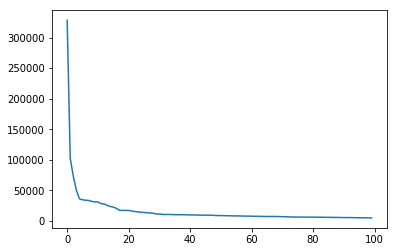

In [68]:
plt.plot(x,frequency)

In [69]:
def prob_1(word):
    return(words_count[word]/len(tokens))

In [70]:
prob_1("我")

0.011210354378414155

In [71]:
prob_1("我们")

0.001308372044443227

In [72]:
###求联合概率

In [85]:
tokens=[str(t) for t in tokens]

In [88]:
token_2_gram=[' '.join(tokens[i:i+2]) for i in range(len(tokens[:-2]))]#2_gram模型

In [91]:
words_count_2=Counter(token_2_gram)

In [93]:
def prob_2(word1,word2):
    if word1+word2 in words_count_2:
        return(words_count_2[word1+word2]/len(token_2_gram))
    else:
        return((prob_1(word1)+prob_1(word2))/2)
    

In [94]:
prob_2('你',"他妈")

0.0019295982262261004

In [95]:
prob_2('我',"爸爸")

0.005688244895177686

In [96]:
prob_2('叫',"爸爸")

0.00030766229436567116

In [112]:
def get_probability(sentence):
    words = cut(sentence)
    sentence_pro = 1
    for i , word in enumerate(words[:-1]):
        next_= words[i+1]
        probability= prob_2(word,next_)
        sentence_pro *= probability
    return sentence_pro

In [115]:
get_probability("小明抽到波音飞机")

1.5142159329547204e-16

In [116]:
get_probability("小明抽到苹果手机")

1.9512158208952973e-15

In [117]:
get_probability("今天晚上请你吃大餐，我们一起吃日料")

7.987307404450297e-37

In [118]:
get_probability("今天晚上请你吃大餐，我们一起吃苹果")

8.501000900265924e-37